# Results visualization
This notebook is used to visualise the outcome of the optimization for the Zambezi river basin case. 

In [3]:
import os 
os.getcwd()
import pandas as pd
import matplotlib.pyplot as plt

## Base case

In [5]:
runname = "BaseCase_35000nfe_5seed"
os.chdir(f'../runs/{runname}')

In [13]:
# Load the merged results
column_names = ['Hydropower', 'Environment', 'Irrigation']
df_bc = pd.read_csv(f"merged_results.csv", usecols = column_names)#, index_col=0) #, usecols = column_names)

In [14]:
df_bc

,Hydropower,Environment,Irrigation
0,12.825387,3.078717e+06,0.679239
1,12.394102,3.738941e+06,0.627351
2,16.920492,8.331760e+05,0.382510
3,12.297244,3.925154e+06,0.664683
4,12.481799,3.597207e+06,0.614620
...,...,...,...
485,12.386100,3.311811e+06,0.770951
486,18.486151,2.751642e+05,1.470478
487,13.848942,1.893212e+06,0.726497
488,13.596205,2.655182e+06,0.487335


In [15]:
print(df_bc.columns)

Index(['Hydropower', 'Environment', 'Irrigation'], dtype='object')


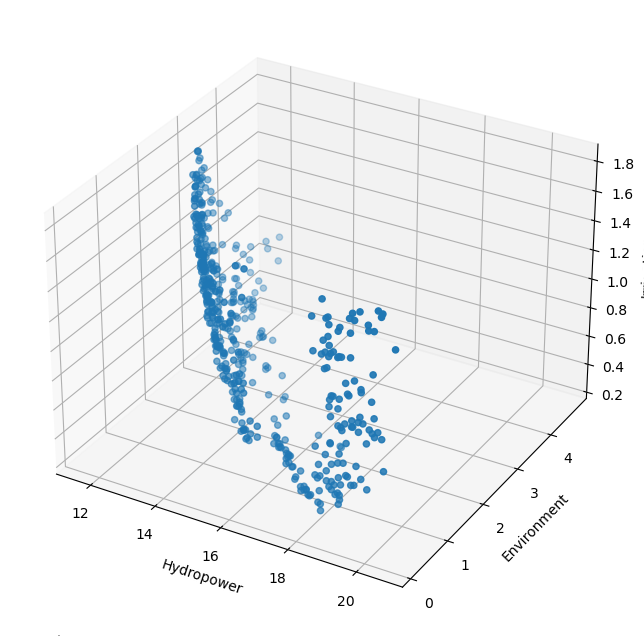

In [16]:
# Create a 3D plot
from mpl_toolkits.mplot3d import Axes3D  

outcomes = df_bc #results.loc[:, ['max_P', 'utility', 'reliability']]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(outcomes.Hydropower, outcomes.Environment, outcomes.Irrigation)
ax.set_xlabel('Hydropower')
ax.set_ylabel('Environment')
ax.set_zlabel('Irrigation')
plt.show()



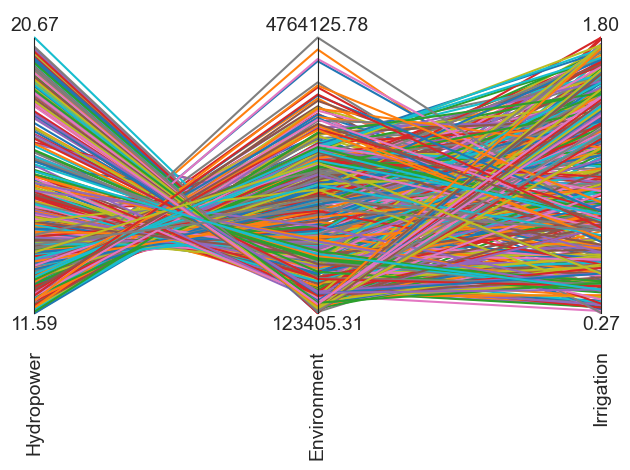

In [17]:
# Create parallel axis
from ema_workbench.analysis import parcoords

limits = parcoords.get_limits(outcomes)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes)

# we invert this axis so direction of desirability is the same 
#axes.invert_axis('max_P') 
plt.show()



In [ ]:
#TODO: Parallel plot



In [18]:
"""

Created on 20 sep. 2011


.. codeauthor:: jhkwakkel <j.h.kwakkel (at) tudelft (dot) nl>

"""

import matplotlib.pyplot as plt
import numpy as np

from ema_workbench import load_results, ema_logging
from ema_workbench.analysis.pairs_plotting import pairs_lines, pairs_scatter, pairs_density

ema_logging.log_to_stderr(level=ema_logging.DEFAULT_LEVEL)

# load the data
#fh = "./data/1000 flu cases no policy.tar.gz"
experiments, outcomes = load_results("merged_results_1_borg_test.csv")

# transform the results to the required format
# that is, we want to know the max peak and the casualties at the end of the
# run
tr = {}

# get time and remove it from the dict
time = outcomes.pop("TIME")

for key, value in outcomes.items():
    if key == "deceased population region 1":
        tr[key] = value[:, -1]  # we want the end value
    else:
        # we want the maximum value of the peak
        max_peak = np.max(value, axis=1)
        tr["max peak"] = max_peak

        # we want the time at which the maximum occurred
        # the code here is a bit obscure, I don't know why the transpose
        # of value is needed. This however does produce the appropriate results
        logical = value.T == np.max(value, axis=1)
        tr["time of max"] = time[logical.T]

pairs_scatter(experiments, tr, filter_scalar=False)
pairs_lines(experiments, outcomes)
pairs_density(experiments, tr, filter_scalar=False)
plt.show()

ReadError: not a gzip file